# Fourier series/expansion

## 1. Using sympy:

We can use the fourier_series() function:
https://docs.sympy.org/latest/modules/series/fourier.html

### Example 1:

Calculate the Fourier expansion of:

$f(x) = x^2$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define symbols
x = sp.symbols('x')

# Function f(x)
y = lambda x: x**2

# Get Fourier series of function
result = sp.fourier_series(x**2, (x, -np.pi, np.pi))

# Same, but using pi from sympy instead of numpy
result1 = sp.fourier_series(x**2, (x, -sp.pi, sp.pi))

# Truncate result to n=5 terms
result_truncated = result.truncate(n=5)
result_truncated1 = result1.truncate(n=5)

# Both show the same result
print(result_truncated)
print()
print(result_truncated1)

-39.4784176043574*cos(0.318309886183791*pi*x)/pi**2 + 9.86960440108936*cos(0.636619772367581*pi*x)/pi**2 - 4.3864908449286*cos(0.954929658551372*pi*x)/pi**2 + 2.46740110027234*cos(1.27323954473516*pi*x)/pi**2 + 3.28986813369645

-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + cos(4*x)/4 + pi**2/3


### Axes:

In [3]:
x_axis = np.arange(-np.pi, np.pi, 0.001)
y_axis = y(x_axis)

y_series = sp.lambdify(x, result_truncated1, "numpy")
y_eval = y_series(x_axis)

### Plotting:

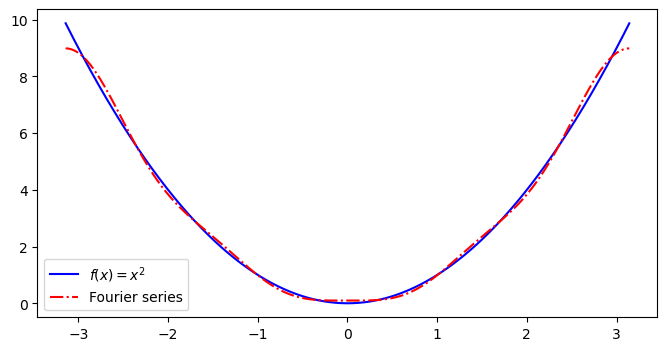

In [4]:
plt.figure(figsize=(8, 4))

plt.plot(x_axis, y_axis, label = r'$f(x)=x^2$', c ='blue')
plt.plot(x_axis, y_eval, label = 'Fourier series', c ='red', linestyle = '-.')

plt.legend()

plt.show()

## Example 2:

Calculate the Fourier expansion of:

$f(x) = 
\left\{
    \begin{array}{lr}
        0, & -\pi \leq x \leq -\frac{\pi}{2}\\
        1, & -\frac{\pi}{2} \leq x \leq +\frac{\pi}{2}\\
        0, & \frac{+\pi}{2} \leq x \leq +\pi
    \end{array}
\right\}$

In [5]:
def function(x):
    
    if(-np.pi <= x <= -0.5*np.pi):
        return 0

    elif(-0.5*np.pi <= x <= +0.5*np.pi):
        return 1
    
    else:
        return 0

### Define axes:

In [6]:
x = np.arange(-np.pi, np.pi, 0.001)

y = []

for i in range(len(x)):
    y.append(function(x[i]))
    
y = np.array(y)

In [7]:
print(x.size, y.size)

6284 6284


### Plotting:


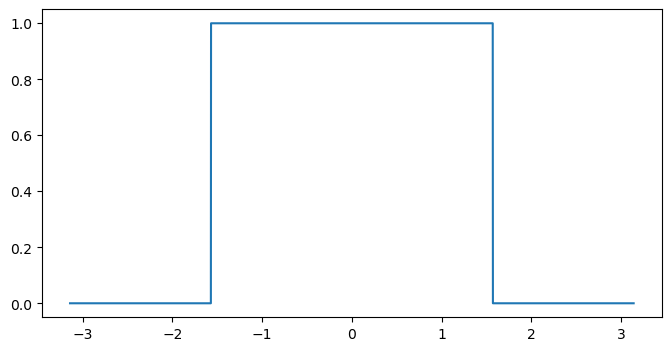

In [8]:
plt.figure(figsize=(8, 4))

plt.plot(x, y)

plt.show()

In [9]:
def function_Fourier(x, n):
    f = np.zeros(x.size)
    f = f + 0.5
    for i in range(1,n+1):
        #print(i)
        y = (2/np.pi)*((-1)**(i-1))*(1/(2*i-1))*np.cos((2*i - 1)*x)
        f += y 
    return f

## Plotting

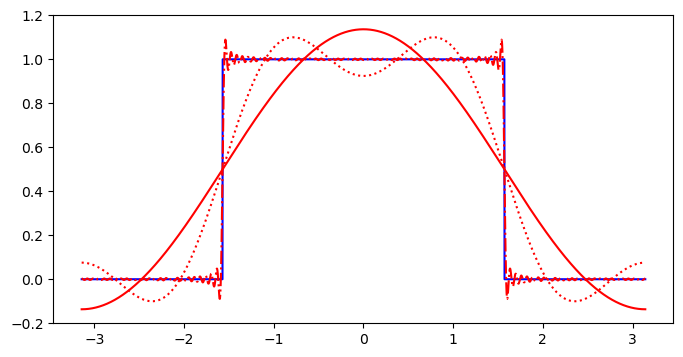

In [10]:
plt.figure(figsize=(8, 4))

plt.plot(x, y, c ='blue')
plt.plot(x, function_Fourier(x, 1), c = 'red')
plt.plot(x, function_Fourier(x, 2), c = 'red', linestyle =':')
plt.plot(x, function_Fourier(x, 50), c = 'red', linestyle ='-.')

plt.show()

## Piece-wise function using sympy:

In [11]:
xx = sp.Symbol('x')

phi_1 = sp.Piecewise((0, xx < -sp.pi/2), (0, xx > +sp.pi/2), (1, True))

print(phi_1)
y_func = sp.lambdify(xx, phi_1, "numpy")
y_axis = y_func(x_axis)

Piecewise((0, (x > pi/2) | (x < -pi/2)), (1, True))


## Fourier series of piece-wise function:

In [12]:
y_fourier = sp.fourier_series(phi_1, (xx, -sp.pi, sp.pi))

y_fouriertruncated1 = y_fourier.truncate(n=5)

y_func2 = sp.lambdify(xx, y_fouriertruncated1, "numpy")
y_axis2 = y_func2(x_axis)

## Plotting:

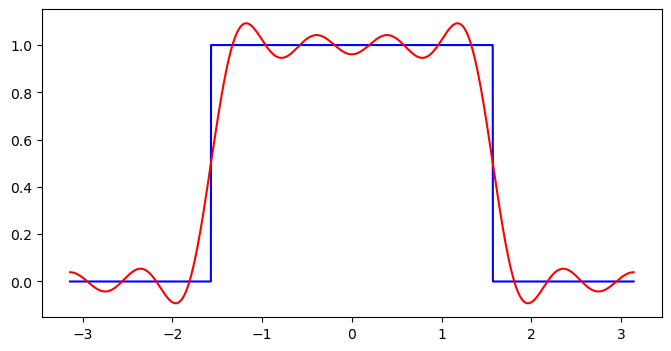

In [14]:
plt.figure(figsize=(8, 4))

plt.plot(x, y_axis, c ='blue')

plt.plot(x, y_axis2, c ='red')
#plt.plot(x, function_Fourier(x, 1), c = 'red')
#plt.plot(x, function_Fourier(x, 2), c = 'red', linestyle =':')
#plt.plot(x, function_Fourier(x, 50), c = 'red', linestyle ='-.')

plt.show()